<a href="https://www.kaggle.com/code/candaceb/eda-feature-engineering-plotly-visuals?scriptVersionId=118602959" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Project Description
This notebook is based on Forbes 2022 List of Billionaires. I used this dataset to practice elements of Feature Engineering including self defined functions, binning data, removing invalid indices, and groupby functions. While Univariate analysis utilizes Matplotlib and Seaborn, I chose to only use Plotly in Multivariate analysis to practice with this library. 

## Import Libraries

In [1]:
# To filter the warnings
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



# Exploratory Data Analysis

**Oberservations:**
*   dataset consists of 2600 rows and 8 columns. 
*   In 2022, the average billionare has at least 4.86 billion dollars in networth.
*   The wealthiest individual has a networth of 219 billion dollars.
*   `Networth` has extreme outliers and the data is right skewed.
*   `Age` has a great range: 19 is the youngest billionare, and 100 is the oldest.
*    Most billionares are between the age of 55 to 74 with a median age of 64.

In [2]:
# Import .csv file
df = pd.read_csv("../input/forbes-billionaires-2022/2022_forbes_billionaires.csv")

In [3]:
# Return first 5 rows
df.head()

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


In [4]:
df.drop(columns=["Unnamed: 0"],inplace=True)
df.head()

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


In [5]:
df.shape

(2600, 7)

In [6]:
# Review each column data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rank      2600 non-null   int64 
 1   name      2600 non-null   object
 2   networth  2600 non-null   object
 3   age       2600 non-null   int64 
 4   country   2600 non-null   object
 5   source    2600 non-null   object
 6   industry  2600 non-null   object
dtypes: int64(2), object(5)
memory usage: 142.3+ KB


In [7]:
# Remove object characters from feature so it can be converted to numerical value
df["networth"] = df["networth"].str.replace("$", "").str.replace("B", "")

In [8]:
# Change the networth type to a float
df["networth"] = df["networth"].astype(float)

In [9]:
# Check for any missing vallues
df.isnull().sum()

rank        0
name        0
networth    0
age         0
country     0
source      0
industry    0
dtype: int64

In [10]:
# Review statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,2600.0,1269.570769,728.146364,1.0,637.0,1292.0,1929.0,2578.0
networth,2600.0,4.860750,10.659671,1.0,1.5,2.4,4.5,219.0
age,2600.0,64.271923,13.220607,19.0,55.0,64.0,74.0,100.0


## Univariate Analysis

Summary:
*    `Rank`: Is really granular which can make it difficult to visualize and difficult to use when comparing to other features. Instead we can focus on the networth column. 
*    `Names`: There are 2598 unique names in the billionare list. There are two families included in the dataset.
*    `Networth`: Likely the most useful column. 58% of billionaires have networth below 2 billion. 
*    `Age`: Another column that is granular, I will create an age groups column for further analysis. 
*    `Country`: Another granular column. This can be treated by creating a groupby dataframe for top 10 countries. Also, it can be categorized by continent rather than individual countries. 
*    `Source`: consists of 895 types of assets. However, many of these asset types might have one data point.
*    `Industry`:has 18 industries represented.
    *     Immediately we see investments at the top of both the source and industry list. Further analysis should be done to determine the breakdown of "investments".
   

In [11]:
# Filtering object type columns
cat_columns = df.describe(include=["object"]).columns
print(cat_columns)
# Filtering numerical type columns
num_columns = df.describe(include=["int","float"]).columns
print(num_columns)

Index(['name', 'country', 'source', 'industry'], dtype='object')
Index(['rank', 'networth', 'age'], dtype='object')


In [12]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

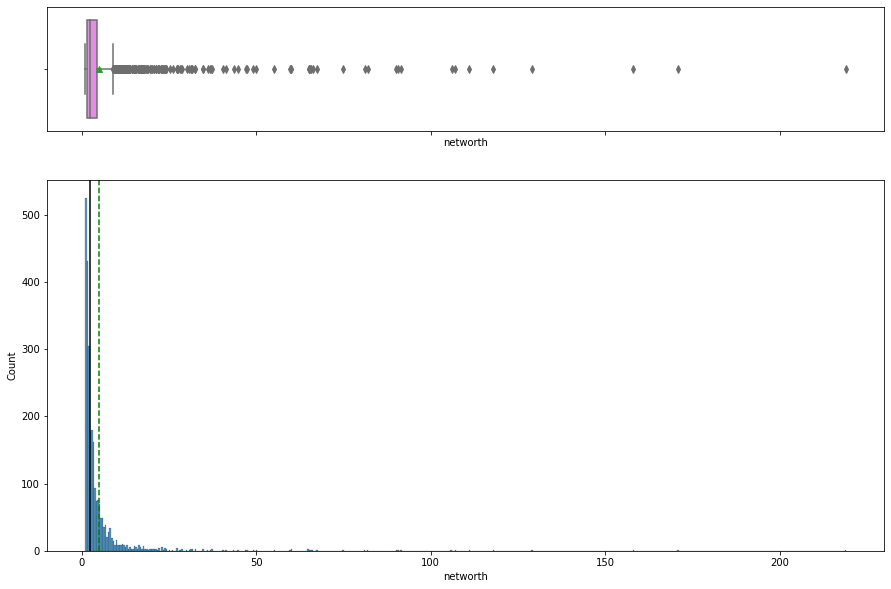

In [13]:
histogram_boxplot(df,'networth')

In [14]:
# Show the number of billionaires with networth smaller than 2 billion
df[df['networth']>2].shape

(1512, 7)

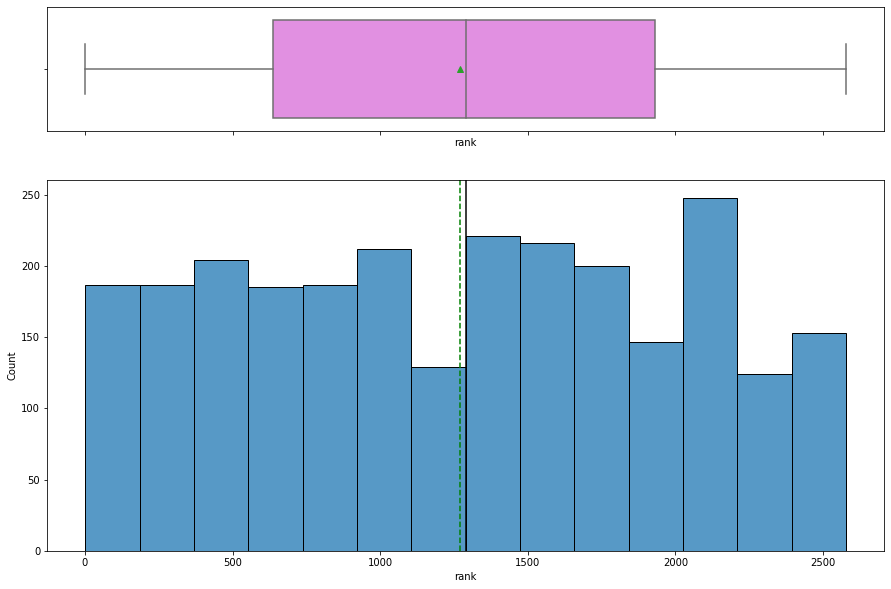

In [15]:
histogram_boxplot(df, 'rank')

In [16]:
df['rank'].nunique()

228

In [17]:
df['rank'].max()

2578

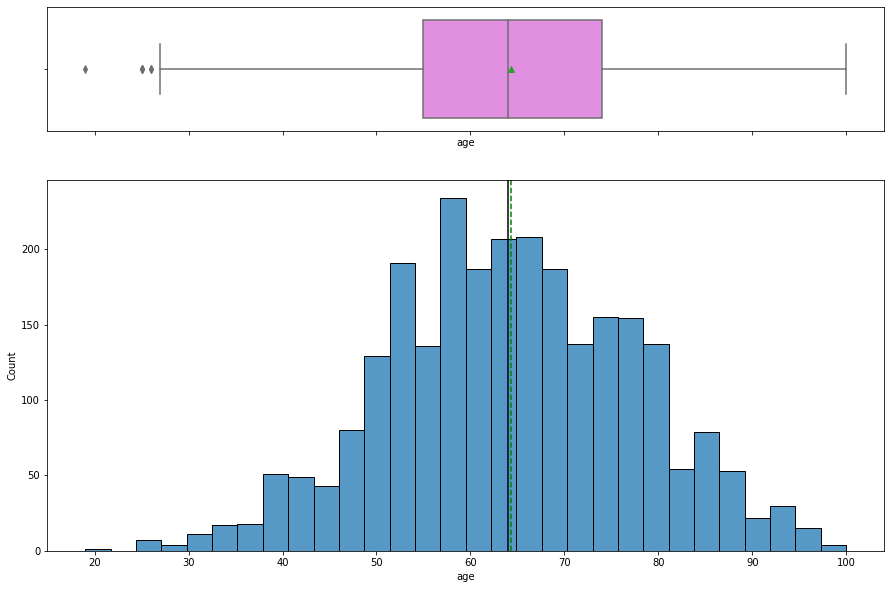

In [18]:
histogram_boxplot(df, 'age')

In [19]:
df['name'].nunique()

2598

In [20]:
# Printing the count of unique categorical levels in each column
for column in cat_columns:
    print(df[column].value_counts())
    print("-" * 10)

Wang Yanqing & family     2
Li Li                     2
Elon Musk                 1
Sanjit Biswas             1
Farkhad Akhmedov          1
                         ..
Apoorva Mehta             1
Arnon Milchan             1
Masahiro Noda             1
Maren Otto                1
Horst-Otto Gerberding     1
Name: name, Length: 2598, dtype: int64
----------
United States           719
China                   515
India                   161
Germany                 130
Russia                   81
Hong Kong                67
Canada                   64
Brazil                   60
Italy                    52
Taiwan                   51
United Kingdom           49
Sweden                   45
Australia                44
France                   43
Switzerland              41
South Korea              41
Japan                    36
Indonesia                30
Israel                   29
Thailand                 28
Spain                    26
Singapore                25
Turkey                   2

# Feature Engineering
 I took the following steps in order to learn more from the dataset:
* Created a `continents` column that groups the countries dataset into continenets
* Created an `age_group` column that groups adults into 4 different lifestages.


In [21]:
# Making continent lists
africa=[
    'Algeria',
    'Egypt',
    'Eswatini (Swaziland)',
    'Morocco',
    'Nigeria',
    'South Africa',
    'Tanzania',
    'Zimbabwe', 
]
asia=[
    'China',
    'Hong Kong',
    'India',
    'Indonesia',
    'Israel',
    'Japan',
    'Lebanon',
    'Malaysia',
    'Nepal', 
    'Oman',
    'Philippines',
    'Qatar',
    'Singapore',
    'South Korea',
    'Taiwan',
    'Thailand',
    'United Arab Emirates',
    'Vietnam',
]
australia_oceania=[
    'Australia',
    'New Zealand',
]
europe=[
    'Austria',
    'Belgium',
    'Bulgaria',
    'Cyprus',
    'Czechia',
    'Denmark',
    'Estonia',
    'Finland',
    'France',
    'Georgia',
    'Germany',
    'Greece',
    'Guernsey',
    'Hungary',
    'Iceland',
    'Ireland',
    'Italy',
    'Kazakhstan',
    'Liechtenstein',
    'Macau',
    'Monaco',
    'Netherlands',
    'Norway',
    'Poland',
    'Portugal',
    'Romania',
    'Russia',
    'Slovakia',
    'Spain',
    'Sweden',
    'Switzerland',
    'Turkey',
    'Ukraine',
    'United Kingdom',
]
north_america =[
    'Barbados',
    'Belize',
    'Canada',
    'Mexico',
    'St. Kitts and Nevis',
    'United States', 
]      
south_america=[
    'Argentina',
    'Brazil',
    'Chile',
    'Colombia',
    'Peru',
    'Venezuela',
    'Uruguay',
]

In [22]:
# Create a function to assist in creating continents column
def region_combining(x):
    if x in africa:
        return "africa"
    elif x in asia:
        return "asia"
    elif x in australia_oceania:
        return "australia_oceania"
    elif x in europe:
        return "europe"
    elif x in north_america:
        return "north_america"
    elif x in south_america:
        return "south_america"
    else:
        return x

In [23]:
# Create a continents column based on country column
df["continents"] = df["country"].apply(region_combining)

In [24]:
bins=[18,36,56,80,100]
labels=['young adulthood','middle age','older adulthood','octogenarian']
df['age_range']=pd.cut(df.age, bins, labels=labels, include_lowest=True)

In [25]:
df['rank'].value_counts()

1929    147
2190    134
2448    130
2324    124
2076    114
1818    111
1729     89
1645     84
1445     68
1096     67
1579     66
1513     66
1341     56
1238     54
1292     49
1397     48
1053     43
1196     42
1012     41
913      38
728      36
1163     33
951      33
851      32
883      30
822      29
984      28
552      27
778      23
2578     23
438      22
665      22
687      22
601      21
801      21
709      19
490      19
637      17
536      16
622      15
586      15
764      14
509      14
350      13
523      13
386      12
654      11
460      11
375      11
480      10
471       9
275       9
304       9
254       9
267       8
288       8
296       8
403       8
343       7
336       7
206       7
411       7
424       7
579       7
431       7
418       6
363       6
235       6
330       6
324       6
369       6
201       5
241       5
246       5
398       5
192       5
316       5
230       5
106       4
197       4
173       4
214       4
167       4
223 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   rank        2600 non-null   int64   
 1   name        2600 non-null   object  
 2   networth    2600 non-null   float64 
 3   age         2600 non-null   int64   
 4   country     2600 non-null   object  
 5   source      2600 non-null   object  
 6   industry    2600 non-null   object  
 7   continents  2600 non-null   object  
 8   age_range   2600 non-null   category
dtypes: category(1), float64(1), int64(2), object(5)
memory usage: 165.4+ KB


In [27]:
df.head()

,rank,name,networth,age,country,source,industry,continents,age_range
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive,north_america,middle age
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology,north_america,older adulthood
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail,europe,older adulthood
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology,north_america,older adulthood
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments,north_america,octogenarian


# Multivariate Analysis using Plotly

**Summary:**
* To begin, two additional dataframes were created to see the total networth by country, and by industry. 
* From there, the following plotly graphs were created (in order of appearance)
    *   Total networth earned by each age group
    *   Ages of billionaires in each industry
    *   Networth of individual billionaires in each industry
    *   Total Billionaire networth earned in each Industry
    *   Top 10 Countries and the total networth of their Billionaire Population
    *   Number of Billionaires in each Continent grouped by Country
    *   Number of Billionairs in each Industry by Continent


In [28]:
df.columns

Index(['rank', 'name', 'networth', 'age', 'country', 'source', 'industry', 'continents', 'age_range'], dtype='object')

In [29]:
# Create a dataframe to show top 10 countries and their billionaires' networths
country_networth=df.groupby('country').sum()[['networth']].sort_values('networth', ascending=False).reset_index().head(10)

In [30]:
# Create a dataframe to show the total networth earned in each industry
industry_networth=df.groupby('industry').sum()[['networth']].sort_values('networth', ascending=False).reset_index()
industry_networth

,industry,networth
0,Technology,2168.40
1,Finance & Investments,1734.30
2,Fashion & Retail,1613.20
3,Manufacturing,1079.80
4,Diversified,939.50
5,Food & Beverage,933.35
6,Healthcare,708.90
7,Real Estate,685.80
8,Automotive,582.60
9,Media & Entertainment,493.60


In [31]:
# Age_Range x Networth
px.bar(df,x='age_range', y='networth', color='age_range',
      title='Total Networth earned by each Age Group')

In [32]:
# Industry x Age
px.box(df, x='industry',y='age',
       title='Ages of Billionaires in each Industry')

In [33]:
# Billionaires evaluated by industry
px.strip(df, x="networth", color='industry', hover_name="name",
        title="Networth of Billionaires in Each Industry")

In [34]:
px.histogram(industry_networth, x='industry', y='networth', color='industry',
            title="Total Billionaire networth earned in each Industry")


In [35]:
fig=px.pie(country_networth, values='networth', names='country',
          title="Top 10 Countries and the total networth of their Billionaire Population")
fig.update_traces(textposition='inside', textinfo='label')
fig.show()

In [36]:
# Billionaires in each country 
px.sunburst(df,path=["continents","country"],
           height=700,
           title="Number of Billionaires in each Continent grouped by Country")

In [37]:
# Billionaires in each country 
px.sunburst(df,path=["continents","industry"],
            height=1000,
           title="Number of Billionairs in each Industry by Continent")

# Final Observations

*   A majority of wealth is owned by individuals between the ages of 56-80 years old. 
*   The most profitable industry for billionaires is Technology. 
*   The United States has the highest number of billionaires, and the highest total networth. 
*   The industries Sports, Gambling & Casinos, and Telecom notably have a shorter age range for it's billionaires. All billionaires in these categories are 48 years or older. 
*   58% of billionaires have networth below 2 billion.
